In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from math import pi


In [ ]:
fileIn = pd.read_csv("Prem2122NEW.csv", delimiter=",")
data = pd.DataFrame(fileIn)
data = data.drop(columns=["Matches\\", "Born"])
data.head()

,Rk,Player,Nation,Pos,Squad,Age,90s,SCA,SCA90,PassLive,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
0,1,Max Aarons\\774cf58b,eng ENG,DF,Norwich City,21,32.0,38,1.19,27,...,2,0,5,0.16,5,0,0,0,0,0
1,2,Che Adams\\f2bf1b0f,sct SCO,FW,Southampton,25,22.7,51,2.25,34,...,11,1,4,0.18,3,0,0,0,0,1
2,3,Rayan A\'eft Nouri\\9b398aea,fr FRA,DF,Wolves,20,20.3,44,2.17,26,...,2,2,6,0.30,4,1,0,0,1,0
3,4,Kristoffer Ajer\\a8c0acb7,no NOR,DF,Brentford,23,22.2,28,1.26,20,...,1,1,6,0.27,3,1,1,0,1,0
4,5,Nathan Ak\'e9\\eaeca114,nl NED,DF,Manchester City,26,10.3,3,0.29,3,...,0,0,0,0.00,0,0,0,0,0,0


In [ ]:
# Creating u21 dataframe
u21_data = data.loc[(data['Age'] <= 21) & (data["90s"] >= 10)]


In [ ]:
# Obtaining lists for data in chart
u21_sorted = u21_data.sort_values("SCA90", ascending=False)
names = list(u21_sorted["Player"].str[:-10])
SCA90 = list(u21_sorted["SCA90"])
names = names[0:15]
SCA90 = SCA90[0:15]

In [ ]:
# The positions for the bars
# This allows us to determine exactly where each bar is located
y = [i * 0.9 for i in range(len(names))]

In [ ]:
# The colors
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

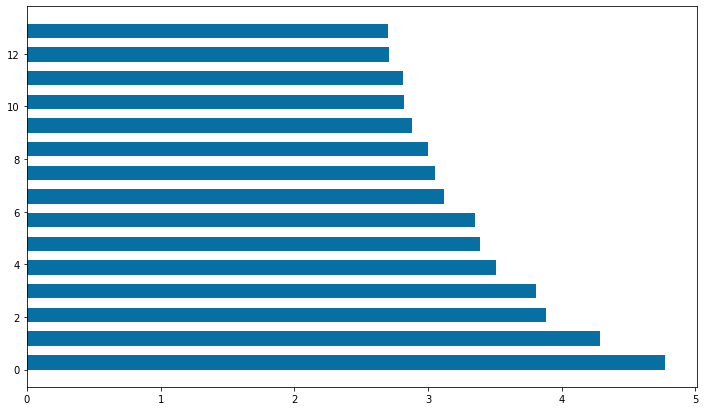

In [ ]:
# Making Chart
fig, ax = plt.subplots(figsize=(12, 7))

ax.barh(y, SCA90, height=0.55, align="edge", color=BLUE);

In [ ]:
ax.xaxis.set_ticks([i * 1 for i in range(0, 12)])
ax.xaxis.set_ticklabels([i * 1 for i in range(0, 12)], size=16, fontfamily="Econ Sans Cnd", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 5))
ax.set_ylim((0, len(names) * 0.9 - 0.2))

# Set whether axis ticks and gridlines are above or below most artists.
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
# This capstyle determines the lines don't go beyond the limit we specified
# see: https://matplotlib.org/stable/api/_enums_api.html?highlight=capstyle#matplotlib._enums.CapStyle
ax.spines["left"].set_capstyle("butt")

# Hide y labels
ax.yaxis.set_visible(False)



In [ ]:
PAD = 0.3
for name, SCA, y_pos in zip(names, SCA90, y):
    x = 0
    color = "white"
    path_effects = None
    if SCA < 8:
        x = SCA
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontfamily="Econ Sans Cnd", fontsize=8, va="center",
        path_effects=path_effects
    ) 
   

findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Econ Sans Cnd'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Milo TE W01'] not found. Falling back to DejaVu Sans.


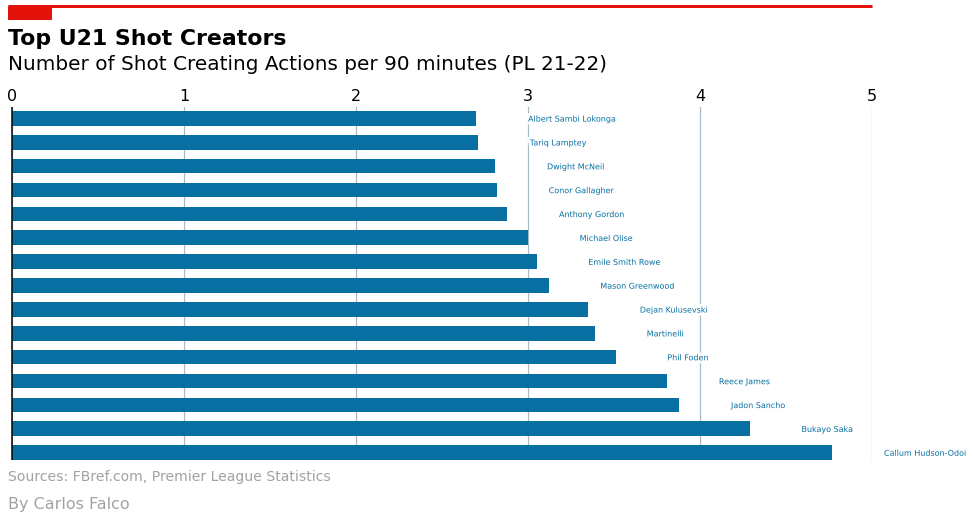

In [ ]:
# Make room on top and bottom
# Note there's no room on the left and right sides
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

# Add title
fig.text(
    0, 0.925, "Top U21 Shot Creators", 
    fontsize=22, fontweight="bold", fontfamily="Econ Sans Cnd"
)
# Add subtitle
fig.text(
    0, 0.875, "Number of Shot Creating Actions per 90 minutes (PL 21-22)", 
    fontsize=20, fontfamily="Econ Sans Cnd"
)

# Add caption
source = "Sources: FBref.com, Premier League Statistics"
fig.text(
    0, 0.06, source, color=GREY, 
    fontsize=14, fontfamily="Econ Sans Cnd"
)

# Add authorship
fig.text(
    0, 0.005, "By Carlos Falco", color=GREY,
    fontsize=16, fontfamily="Milo TE W01"
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Set facecolor, useful when saving as .png
fig.set_facecolor("white")
fig

#fig.savefig("plot.png", dpi=300)

Concluisions from simple bar chart - the players that generate the most attacking danger by generating shot creating actions per 90 mins are:

- Callum Hudson-Odoi
- Buyako Saka
- Jadon Sancho
- Reece James
- Phil Foden
- Gabriel Martinelli

The next question is, how do they create these actions?
There are six ways to lead to a shot creating action:
- Live ball pass
- Dead ball pass
- Dribble
- Shot
- Foul
- Defensive action

Let's see how the top young bucks weigh up in their chance generation.

In [ ]:
u21_2_sorted = u21_sorted.iloc[:, [1, 10, 11, 12, 13, 14]]
spiderdata = u21_2_sorted[:4]
spiderdata["Player"] = spiderdata["Player"].str[:-10]

spiderdata.head(9)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Player,PassDead,Drib,Sh,Fld,Def
220,Callum Hudson-Odoi,0,7,3,4,0
428,Bukayo Saka,18,12,7,10,1
434,Jadon Sancho,3,9,2,1,0
230,Reece James,8,3,4,3,0


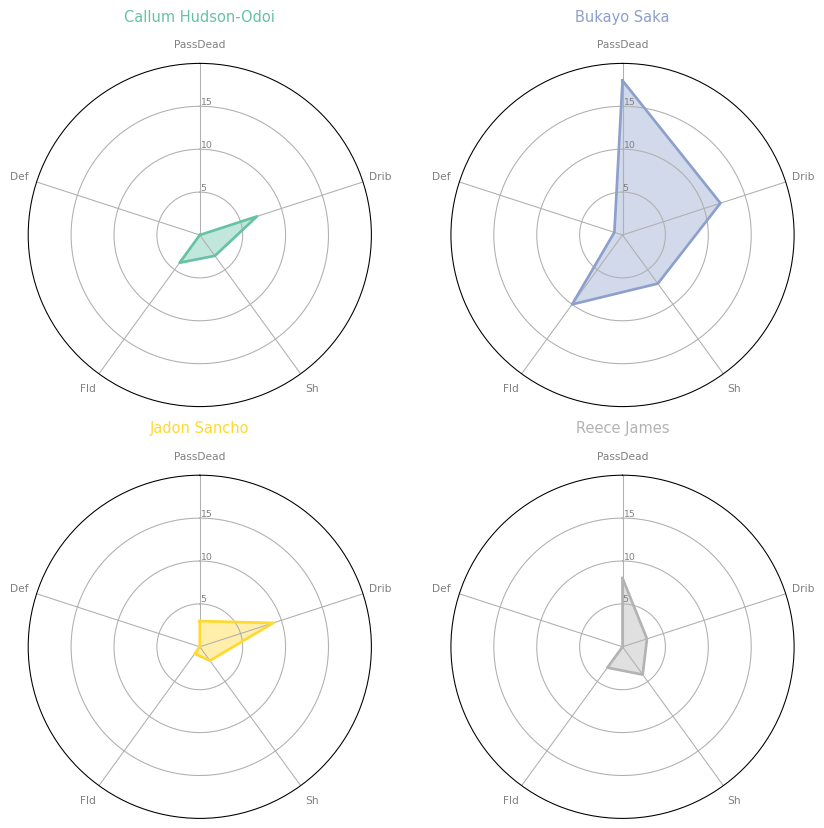

In [ ]:
def make_spider(row, title, color):

    # number of variable
    categories=list(spiderdata)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True)

    # First axis to be on top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([5,10,15], ["5","10","15"], color="grey", size=7)
    plt.ylim(0,20)

    # Ind1
    values = spiderdata.iloc[row].drop(["Player"]).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)


# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(spiderdata.index))
 
# Loop to plot
for row in range(0, len(spiderdata.index)):
  make_spider(row=row, title=(spiderdata["Player"].values[row]), color=my_palette(row))